# Plotting data

In [146]:
import pandas as pd
global_confirmed = pd.read_csv("Data/time_series_covid19_confirmed_global.csv")
global_deaths = pd.read_csv("Data/time_series_covid19_deaths_global.csv")
global_recovered = pd.read_csv("Data/time_series_covid19_recovered_global.csv")
global_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [147]:
# Filter data
global_confirmed =  global_confirmed.drop(columns=["Long", "Lat", "Province/State"])
global_deaths =  global_deaths.drop(columns=["Long", "Lat", "Province/State"])
global_recovered =  global_recovered.drop(columns=["Long", "Lat", "Province/State"])
global_confirmed.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,Albania,0,0,0,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,Algeria,0,0,0,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,Andorra,0,0,0,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,Angola,0,0,0,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


In [174]:
import matplotlib.pyplot as plt
def get_country_data(country):
    # Filter country
    country_confirmed = global_confirmed.loc[global_confirmed['Country/Region'] == country]
    country_deaths = global_deaths.loc[global_deaths['Country/Region'] == country]
    country_recovered = global_recovered.loc[global_recovered['Country/Region'] == country]
    
    #country_confirmed = country_confirmed.rename(index={28:'confirmed'})
    #country_deaths = country_deaths.rename(index={28:'deaths'})
    #country_recovered = country_recovered.rename(index={29:'recovered'})
    
    country_data = pd.concat([country_confirmed, country_deaths, country_recovered]).T
    #country_data = country_data.drop(index="Country/Region")
    return country_data

def plot_country_data(country_data):
    plt.rcParams['figure.figsize'] = [15, 8]
    ax = plt.gca()
    country_data.plot(kind='line',y='confirmed',ax=ax)
    country_data.plot(kind='line',y='deaths', color='red', ax=ax)
    country_data.plot(kind='line',y='recovered',ax=ax)
    plt.grid(color='r', linestyle='-', linewidth=0.5)
    plt.show()

## Peru

In [173]:
peru_data = get_country_data("Peru")
peru_data.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
181,Peru,0,0,0,0,0,0,0,0,0,...,416,480,580,635,671,852,950,1065,1323,1414
181,Peru,0,0,0,0,0,0,0,0,0,...,7,9,9,11,16,18,24,30,38,55
178,Peru,0,0,0,0,0,0,0,0,0,...,1,1,14,16,16,16,53,394,394,537


## Brazil

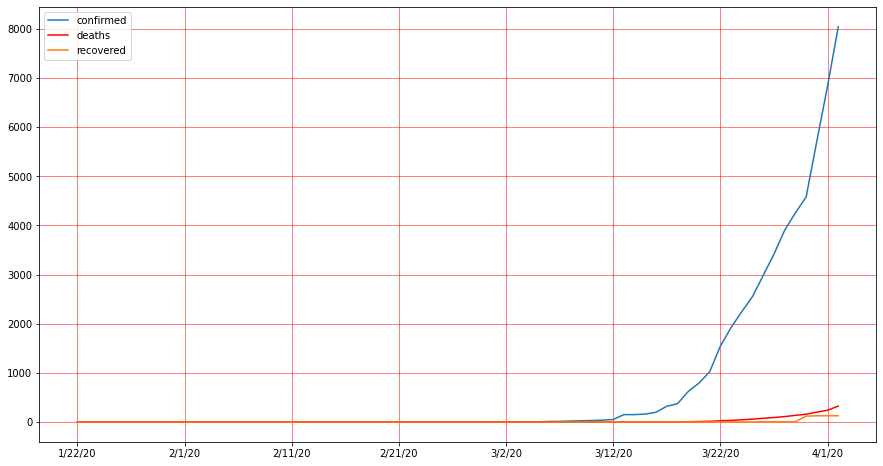

In [161]:
brazil_data = get_country_data("Brazil")
plot_country_data(brazil_data)

In [166]:
china_data = get_country_data('China')
china_data.head()

KeyError: "['Country/Region'] not found in axis"